# Trying out sigmoid fadeouts 

## One-dimensional sigmoids 

In [1]:
import numpy as np
# Trying radius first
a = np.array(np.tile(1,50)) # 50-item array
fixHole = 10
fadeHole = 20
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
aFixHole = a[0:fixHole]
print aFixHole

[1 1 1 1 1 1 1 1 1 1]


In [2]:
aSize = a.shape[0]
print aSize

50


In [4]:
aFadeOut = a[aSize-fadeHole:aSize]
print aFadeOut

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
x = np.linspace(-5,5,fixHole)
print x

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


In [6]:
print sigmoid(x)

[ 0.00669285  0.02005754  0.0585369   0.1588691   0.36457644  0.63542356
  0.8411309   0.9414631   0.97994246  0.99330715]


## 2D sigmoids

In [303]:
%matplotlib inline
# loading libraries
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D projection
# initiating constants:
grtSz = 256
fixR = 10 # fixation radius - this will be entirely blank
fixFade = 10 # the fading over this many pixels
boundR = 115
boundFade = (grtSz/2)-boundR

In [304]:
x = np.arange(-grtSz/2,grtSz/2)
y = np.arange(-grtSz/2,grtSz/2)
#print '===x==='
#print x
#print '===y==='
#print y
x, y = np.meshgrid(x, y)
#print '===x==='
#print x+.5
#print '===y==='
#print y+.5
#print '===R==='
#R = np.sqrt(x**2 + y**2)
R = np.sqrt((x+.5)**2 + (y+.5)**2) # adding .5 ensures symmetry
#print R

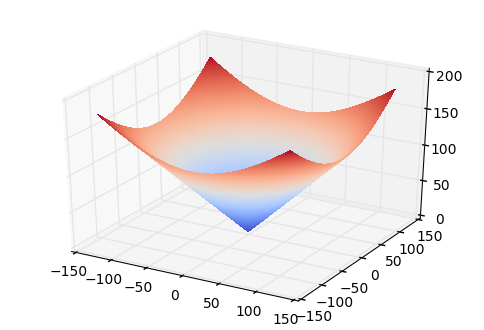

In [305]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, R, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

In [306]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, R)
#plt.show()

In [307]:
# transforming R such that the pixels within fixR are < -5 and within fixR+fixFade are > 5
transR = R * (10./fixFade)
newR = transR - (fixR * (10./fixFade)) - 5
fixMask = sigmoid(newR)*2 - 1
print 'startVal=' + str(fixR)
print 'k=' + str(10./fixFade)
print 'startVal*k=' + str((10./fixFade)*fixR)
print 'endVal*k=' + str((10./fixFade)*(fixR+fixFade))
#print R
#print transR
#print newR

startVal=10
k=1.0
startVal*k=10.0
endVal*k=20.0


In [308]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#surf = ax.plot_surface(x, y, transR, rstride=1, cstride=1, cmap=cm.coolwarm, 
#                       linewidth=0, antialiased=False)
#plt.show()

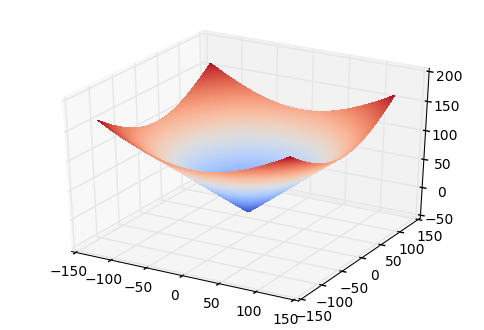

In [309]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, newR, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

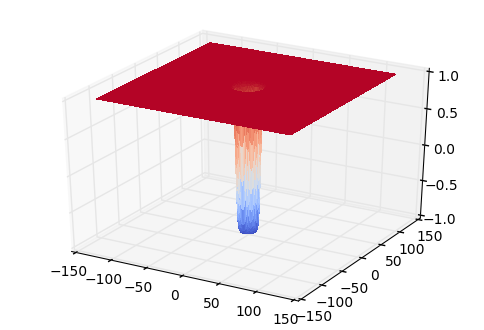

In [310]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, fixMask, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

In [311]:
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(x, y, fixMask)
#plt.show()

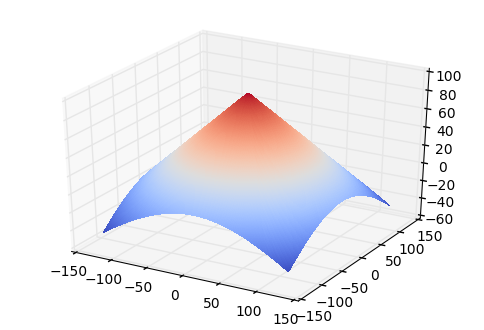

In [315]:
newR = R * (-10./(boundFade)) + 5 + boundR*(10./boundFade)
boundMask = sigmoid(newR)*2-1
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, newR, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

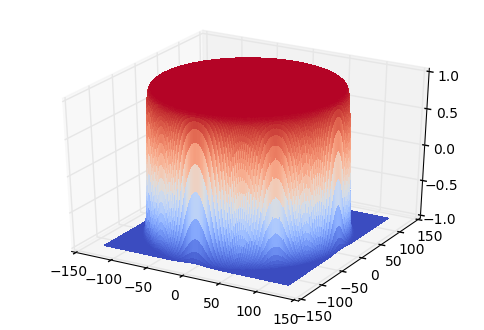

In [316]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, boundMask, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()

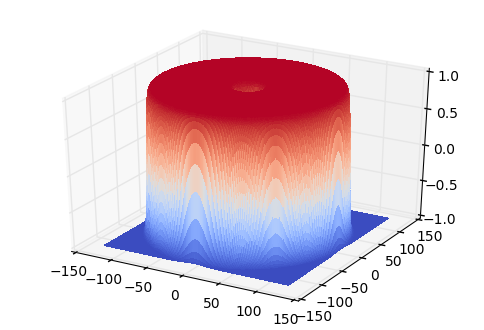

In [317]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, fixMask*boundMask, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=False)
plt.show()